In [1]:
import lecroy
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *

LECROY,WR620ZI,LCRY2805N57162,8.5.1


In [2]:
lecroy.clear_all()
lecroy.set_tdiv(100e-9)

# access scope sources by labels
s = {
    "RIGOL_AWG_CH2"    :"C1", # set to 50R DC
    "PASTTREC_LVDS"    :"C4", # use LeCroy ZD1500 differential probe
    "PASTTREC_analog"  :"C3"  # set to 50R DC
}

# set vertical amplifications and offsets
lecroy.set_vdiv(              s["PASTTREC_LVDS"],200e-3)

lecroy.set_vdiv(              s["RIGOL_AWG_CH2"],1)

lecroy.set_vdiv(              s["PASTTREC_analog"],100e-3 )
lecroy.set_voffset(           s["PASTTREC_analog"],-1000e-3 )


# access scope measurements by labels
m = {
    "PASTTREC_t1"  : "p3",
    "PASTTREC_tot" : "p4"
}

# TDC measurements for differential probe at 100R terminated PASTTREC LVDS output
lecroy.setup_measurement(m["PASTTREC_t1"] ,s["PASTTREC_LVDS"],"delay")
lecroy.setup_measurement(m["PASTTREC_tot"],s["PASTTREC_LVDS"],"widthn")


# access scope trigger channels by labels

t = {
    "RIGOL_AWG_SYNC1" : "D9",
    "RIGOL_AWG_SYNC2" : "D10"
}







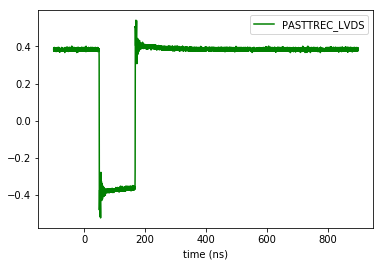

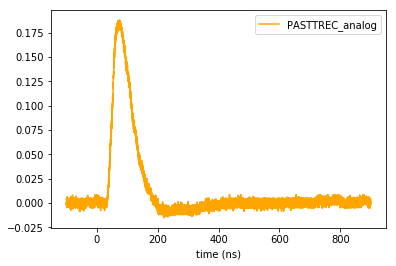

In [3]:
lecroy.set_trig_source(t["RIGOL_AWG_SYNC1"])

time, wfm = lecroy.capture_waveforms([
    s["PASTTREC_LVDS"],
    s["PASTTREC_analog"]
])

time_ns = time*1e9

# remove analog signal baseline, calculate bl from the first 10% of the sample
pt_ana = wfm[s["PASTTREC_analog"]]
pt_ana = remove_baseline(pt_ana,fraction=0.08)

plt.plot(time_ns,wfm[s["PASTTREC_LVDS"]] ,"g" ,label="PASTTREC_LVDS")
plt.legend()
plt.xlabel("time (ns)")
plt.show()

plt.plot(time_ns,pt_ana,"orange",label="PASTTREC_analog")
plt.legend()
plt.xlabel("time (ns)")
plt.show()


In [4]:
# measure t1 and tot, calculate mean and standard deviation

stats = lecroy.measure_statistics([
    m["PASTTREC_t1"],
    m["PASTTREC_tot"]
],10)

pt_t1  = stats[m["PASTTREC_t1"]]
pt_tot = stats[m["PASTTREC_tot"]]

print("PASTTREC LVDS t1  => mean: {:e}, stdev: {:e}".format(np.mean(pt_t1) ,np.std(pt_t1)))
print("PASTTREC LVDS tot => mean: {:e}, stdev: {:e}".format(np.mean(pt_tot),np.std(pt_tot)))

PASTTREC LVDS t1  => mean: 4.962397e-08, stdev: 1.689876e-10
PASTTREC LVDS tot => mean: 1.169631e-07, stdev: 1.292323e-09


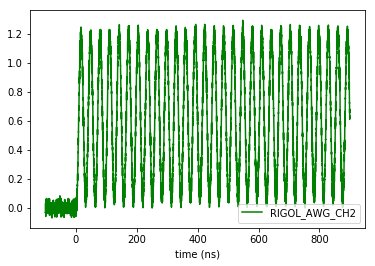

In [5]:
# record a waveform with a different trigger

lecroy.set_trig_source(t["RIGOL_AWG_SYNC2"])

time, wfm = lecroy.capture_waveforms([
    s["RIGOL_AWG_CH2"]
])

time_ns = time*1e9


plt.plot(time_ns,wfm[s["RIGOL_AWG_CH2"]] ,"g" ,label="RIGOL_AWG_CH2")
plt.legend()
plt.xlabel("time (ns)")
plt.show()